In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# load network.txt
edges = []
with open('network.txt') as f:
    for line in f:
        edges.append([int(u) for u in line.split()])

# create adjacency matrix
n = max(max(u) for u in edges)
A = np.zeros((n, n))
for u, v in edges:
    A[u-1, v-1] = 1

In [21]:
# load Ratings.timed.csv
ratings = pd.read_csv('Ratings.timed.csv')


In [22]:
def find_probability(v, u):
    # find the probability of v being infected by u
    # v and u are indices of the nodes
    # return a float
    
    if A[v-1,u-1] == 0:
        return 0
    elif len(ratings[ratings['userid'] == v]) == 0:
        return 0
    else:
        # merge the two dataframes such that v action  = u action and v time < u time
        df = pd.merge(ratings[ratings['userid'] == v], ratings[ratings['userid'] == u], on = 'movieid', how = 'inner')
        df = df[df['date_x'] < df['date_y']]
        # calculate the probability
        return len(df)/len(ratings[ratings['userid'] == v]) # A_vu/A_v


In [23]:
# find the probability of each edge
output = []
for u, v in edges:
    probability = find_probability(u,v)
    output.append([u, v, probability])

# save the output
with open('output.txt', 'w') as f:
    for u, v, probability in output:
        f.write('{} {} {}\n'.format(u, v, probability))

In [25]:
# store the probabilities in adjacency matrix
P = np.zeros((n, n))
for u, v in edges:
    P[u-1, v-1] = find_probability(u,v)

# find node degrees
degrees = np.sum(P, axis=1)



NameError: name 'plt' is not defined

(array([9.871e+03, 6.300e+01, 1.200e+01, 3.700e+01, 2.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

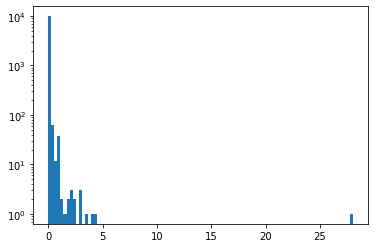

In [28]:
# draw histogram of node degrees on log scale
plt.hist(degrees, bins=100, log=True)